In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix #silhouette_score,

In [2]:
df=pd.read_csv("iris.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### EDA

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
df.shape

(150, 5)

In [6]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

### Statistical Summay

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


### Univariate Analysis

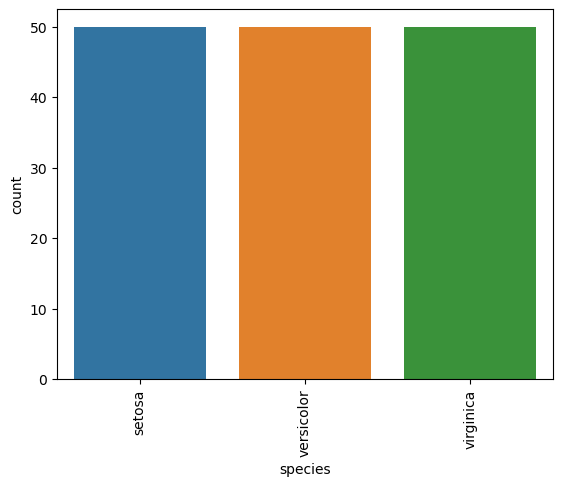

In [8]:
sns.countplot(x="species",data=df,order=df["species"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

### Bivariate Analysis

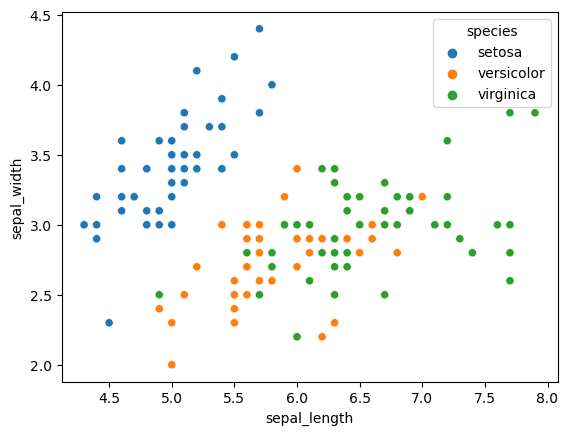

In [9]:
sns.scatterplot(data=df,x=df["sepal_length"],y=df["sepal_width"],hue=df["species"])
plt.show()

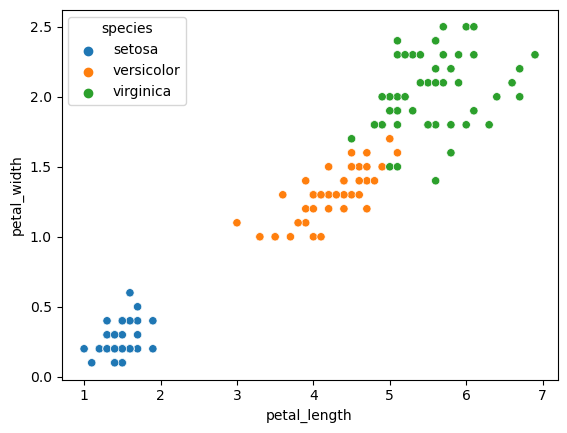

In [10]:
sns.scatterplot(data=df,x=df["petal_length"],y=df["petal_width"],hue=df["species"])
plt.show()

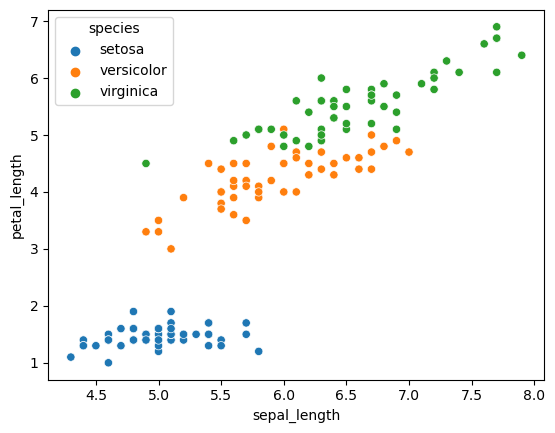

In [11]:
sns.scatterplot(data=df,x=df["sepal_length"],y=df["petal_length"],hue=df["species"])
plt.show()

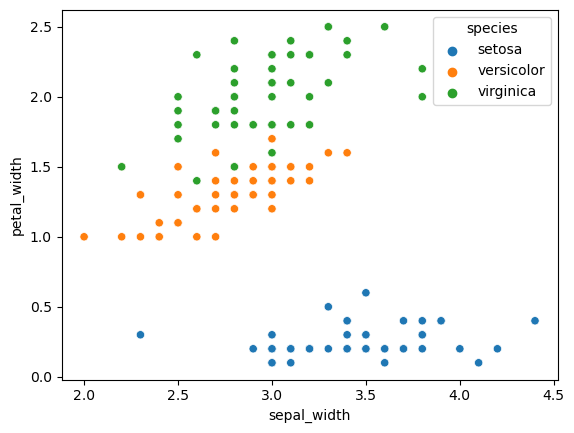

In [12]:
sns.scatterplot(data=df,x=df["sepal_width"],y=df["petal_width"],hue=df["species"])
plt.show()

### Feature Engineering

In [13]:
df.duplicated().sum() 

1

In [14]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


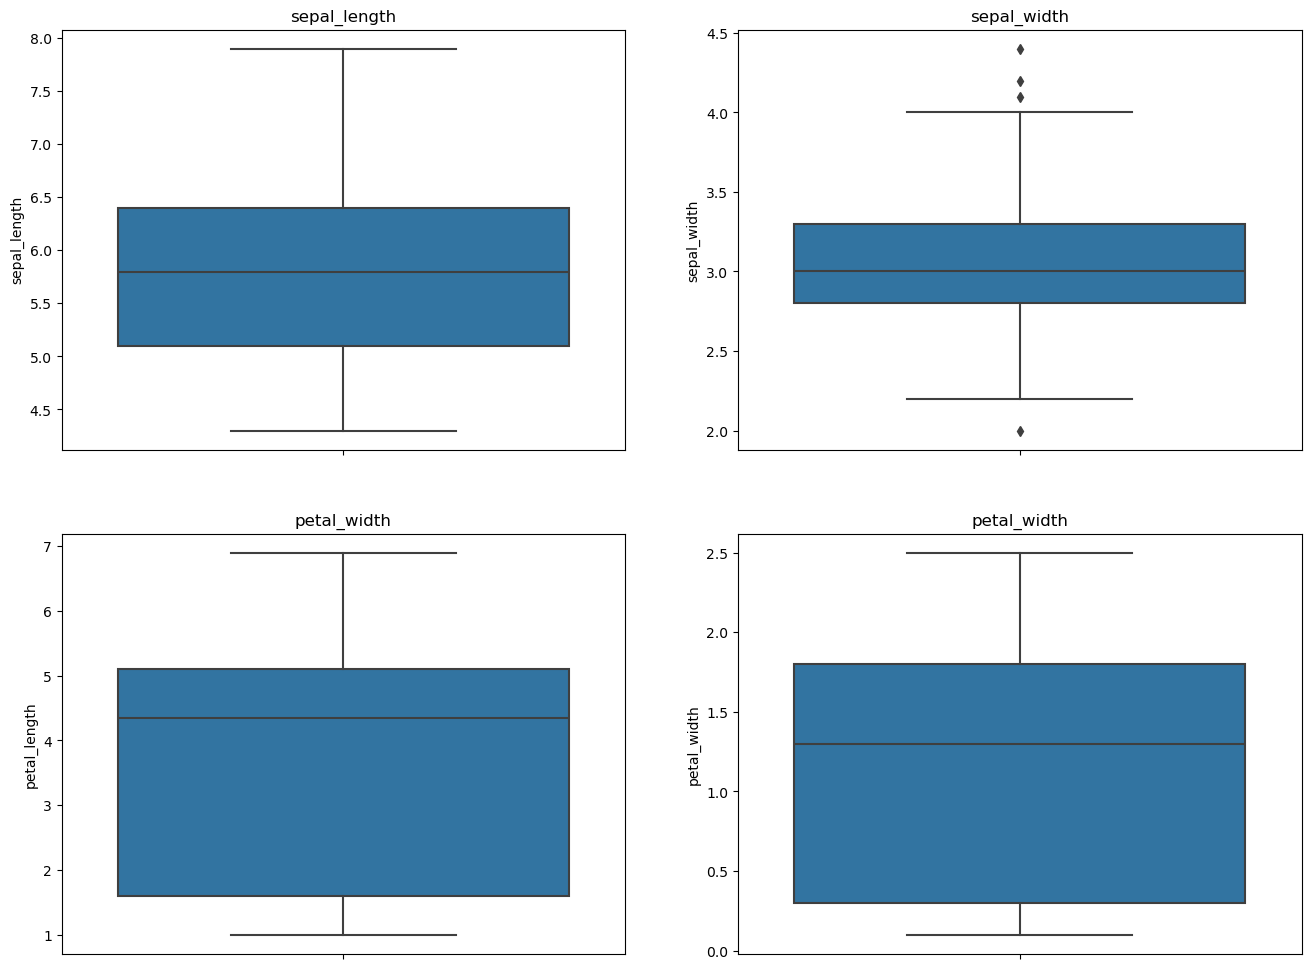

In [15]:
# Search for outliers

plt.figure(figsize=(16,12))

plt.subplot(2,2,1)
box1=sns.boxplot(y=df.sepal_length)
plt.title("sepal_length")

plt.subplot(2,2,2)
box2=sns.boxplot(y=df.sepal_width)
plt.title("sepal_width")

plt.subplot(2,2,3)
box3=sns.boxplot(y=df.petal_length)
plt.title("petal_width")

plt.subplot(2,2,4)
box4=sns.boxplot(y=df.petal_width)
plt.title("petal_width")
plt.show()

In [17]:
# Outliers 

Q1=df["sepal_width"].quantile(0.25)
print(Q1)
Q3=df["sepal_width"].quantile(0.75)
print(Q3)

2.8
3.3


In [18]:
IQR=Q3-Q1
IQR

0.5

In [19]:
lower_bound=Q1 - 1.5 * IQR
upper_bound=Q3 + 1.5 * IQR
print("lower_bound: ", lower_bound)
print("upper_bound: ", upper_bound)

lower_bound:  2.05
upper_bound:  4.05


In [20]:
mean_sepal_width=df.loc[(df["sepal_width"]>=lower_bound) & (df["sepal_width"]<=upper_bound),"sepal_width"].mean()
mean_sepal_width

3.0404109589041095

In [21]:
df.loc[(df["sepal_width"]<lower_bound) | (df["sepal_width"]>upper_bound),"sepal_width"]= mean_sepal_width

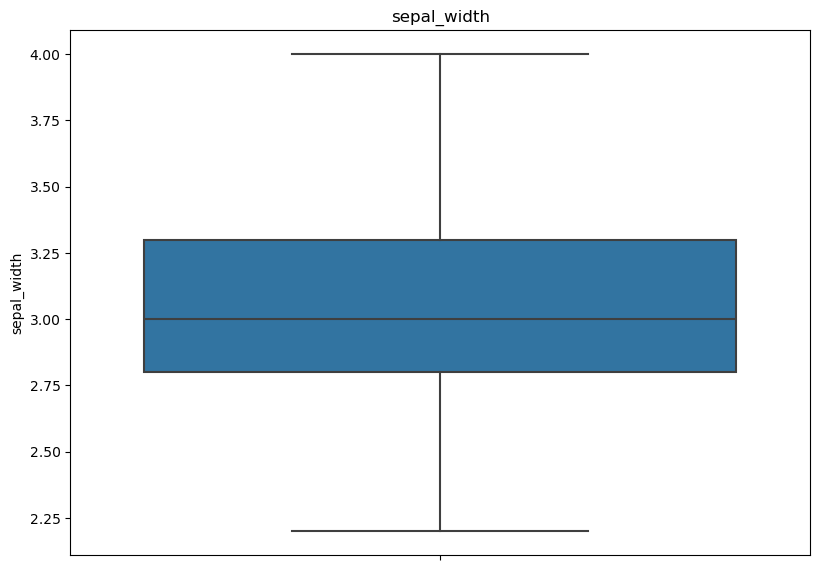

In [22]:
plt.figure(figsize=(21,15))

plt.subplot2grid((2,2),(0,0))  # subplot(2 plots in one space), (2,2)-dimension, (0,0)-coordinate location of each figure
box1=sns.boxplot(y=df.sepal_width)
plt.title("sepal_width")
plt.show()

In [23]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [24]:
# label Encoding

le=LabelEncoder()
df["species"]=le.fit_transform(df["species"])
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [25]:
# x-Y split

x=df.drop(columns=["species"])
y=df["species"]

In [26]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.3,random_state=3)

In [27]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
51,6.4,3.2,4.5,1.5
23,5.1,3.3,1.7,0.5
83,6.0,2.7,5.1,1.6
142,5.8,2.7,5.1,1.9
84,5.4,3.0,4.5,1.5
...,...,...,...,...
107,7.3,2.9,6.3,1.8
21,5.1,3.7,1.5,0.4
0,5.1,3.5,1.4,0.2
131,7.9,3.8,6.4,2.0


In [28]:
y_train

51     1
23     0
83     1
142    2
84     1
      ..
107    2
21     0
0      0
131    2
106    2
Name: species, Length: 105, dtype: int32

In [51]:
x_test.shape

(45, 4)

In [29]:
# Algorithms

from sklearn.linear_model import LogisticRegression
model_lr=LogisticRegression()
model_lr.fit(x_train,y_train)
y_pred_lr=model_lr.predict(x_test)
print("Accuracy: ", accuracy_score(y_test,y_pred_lr))

Accuracy:  0.9777777777777777


In [36]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))


Confusion Matrix:
 [[17  0  0]
 [ 0 13  1]
 [ 0  0 14]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [37]:
from sklearn.tree import DecisionTreeClassifier
model_dt=DecisionTreeClassifier()
model_dt.fit(x_train,y_train)
y_pred_dt=model_dt.predict(x_test)
print("Accuracy: ", accuracy_score(y_test,y_pred_dt))

Accuracy:  0.9111111111111111


In [38]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt))


Confusion Matrix:
 [[17  0  0]
 [ 0 10  4]
 [ 0  0 14]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.71      0.83        14
           2       0.78      1.00      0.88        14

    accuracy                           0.91        45
   macro avg       0.93      0.90      0.90        45
weighted avg       0.93      0.91      0.91        45



In [39]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier()
model_knn.fit(x_train,y_train) 
y_pred_knn= model_knn.predict(x_test)
print("Accuracy: ", accuracy_score(y_test,y_pred_knn))

Accuracy:  0.9555555555555556


In [40]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))


Confusion Matrix:
 [[17  0  0]
 [ 0 12  2]
 [ 0  0 14]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.86      0.92        14
           2       0.88      1.00      0.93        14

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [42]:
from sklearn.naive_bayes import GaussianNB
model_nb=GaussianNB() 
model_nb.fit(x_train,y_train) 
y_pred_nb= model_nb.predict(x_test)
print("Accuracy: ", accuracy_score(y_test,y_pred_nb))

Accuracy:  0.9777777777777777


In [43]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))


Confusion Matrix:
 [[17  0  0]
 [ 0 13  1]
 [ 0  0 14]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [44]:
from sklearn.svm import SVC
model_svc=SVC(gamma='auto')
model_svc.fit(x_train,y_train) 
y_pred_svc= model_svc.predict(x_test)
print("Accuracy: ", accuracy_score(y_test,y_pred_svc))

Accuracy:  0.9777777777777777


In [45]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svc))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svc))


Confusion Matrix:
 [[17  0  0]
 [ 0 13  1]
 [ 0  0 14]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [46]:
from sklearn.ensemble import RandomForestClassifier
model_rf=RandomForestClassifier(n_estimators=30,criterion='entropy',random_state=0)  # object creation
model_rf.fit(x_train,y_train)
y_pred_rf= model_rf.predict(x_test)
print("Accuracy: ", accuracy_score(y_test,y_pred_rf))

Accuracy:  0.9555555555555556


In [47]:
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


Confusion Matrix:
 [[17  0  0]
 [ 0 13  1]
 [ 0  1 13]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.93      0.93      0.93        14
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [48]:
X_new=[[4.7,3.2,1.3,0.2]]
# X_new=[[6.5,3.0,5.2,2.0]]
Y_new=model_svc.predict(X_new)
print(Y_new)

[0]
